In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from functools import partial
from random import choices, randint, randrange, random, sample
from typing import List, Optional, Callable, Tuple
import numpy as np
# from geneticalgorithm import geneticalgorithm as ga
import pandas as pd
from collections import Counter
from tqdm import tqdm
import time
from Bio.SeqUtils import MeltingTemp
from Bio import SeqIO
from plotly import graph_objects as go
import json
from imp import reload
import primer_selection
reload(primer_selection)
# import testing
# reload(testing)
import math
import Thermo
reload(Thermo)

/tmp/ipykernel_2805645/2147551372.py:18: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  from imp import reload


<module 'Thermo' from '/mnt/storage10/lwang/Projects/Amplicone_design_tool/model2in1/Thermo.py'>

In [10]:
d = pd.DataFrame(columns = ['A','B'])
data1 = {'A': [1,2], 'B': [3,4]}
data2 = {'A': [5,6], 'B': [7,8]}
df1 = pd.DataFrame (data1)
df2 = pd.DataFrame (data2)
result = pd.concat([d, df1, df2])

In [6]:
result

,C,B,A
0,NaN,3,1.0
1,NaN,4,2.0
0,NaN,7,5.0
1,NaN,8,6.0


In [2]:
thai  = pd.read_csv('/mnt/storage10/lwang/Projects/Amplicone_design_tool/50k_vcf_parsed/vcf_country/txt/Thailand.txt')

In [2]:
def value_counts_list(lst):
    """
    Computes the frequency count of unique elements in a list and returns a dictionary, sorted by frequency count in
    descending order.

    Args:
    - lst (list): List of elements

    Returns:
    - dict: Dictionary with unique elements as keys and their frequency count as values, sorted by frequency count
    in descending order
    """
    value_counts = {}
    for item in lst:
        if item in value_counts:
            value_counts[item] += 1
        else:
            value_counts[item] = 1
    sorted_value_counts = dict(sorted(value_counts.items(), key=lambda x: x[1], reverse=True))
    return sorted_value_counts

def print_full(x):
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 2000)
    pd.set_option('display.float_format', '{:20,.2f}'.format)
    pd.set_option('display.max_colwidth', None)
    print(x)
    pd.reset_option('display.max_rows')
    pd.reset_option('display.max_columns')
    pd.reset_option('display.width')
    pd.reset_option('display.float_format')
    pd.reset_option('display.max_colwidth')

In [2]:
vcf_parse = pd.read_csv('/mnt/storage10/lwang/Projects/Amplicone_design_tool/50k_vcf_parsed/output.csv')
csv_ = "/mnt/storage10//jody/tb_data_2022_08_19.csv"
df = pd.read_csv(csv_)

/tmp/ipykernel_2805645/3483146208.py:3: DtypeWarning: Columns (12,15,16,17,19,20,47,48,49,51,53,54,56,57,58,59,62,63) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_)


In [3]:
df

,wgs_id,mapped_reads,percent_mapped,median_depth,missingness,main_lineage,sublineage,drug_resistance_type,run_accession,sample_accession,...,tissue_type,culture_collection,isolation_source,strain,submitted_host_sex,center_name,host_tax_id,collected_by,isolate,description
0,ERR2864235,4385339,99.52,186,0.93,lineage2,lineage2.2.1,MDR-TB,ERR2864235,SAMEA5056353,...,NaN,NaN,NaN,NaN,NaN,NATIONAL INSTITUTE OF HEALTH DR. RICARDO JORGE,NaN,NaN,NaN,PT_TB0001
1,ERR2864288,3098879,99.76,132,1.35,lineage4,lineage4.3.4.2,MDR-TB,ERR2864288,SAMEA5056354,...,NaN,NaN,NaN,NaN,NaN,NATIONAL INSTITUTE OF HEALTH DR. RICARDO JORGE,NaN,NaN,NaN,PT_TB0002
2,ERR2864247,2158769,99.78,83,1.18,lineage4,lineage4.3.3,MDR-TB,ERR2864247,SAMEA5056355,...,NaN,NaN,NaN,NaN,NaN,NATIONAL INSTITUTE OF HEALTH DR. RICARDO JORGE,NaN,NaN,NaN,PT_TB0003
3,ERR2864239,2198316,99.86,98,1.24,lineage4,lineage4.3.4.2,MDR-TB,ERR2864239,SAMEA5056356,...,NaN,NaN,NaN,NaN,NaN,NATIONAL INSTITUTE OF HEALTH DR. RICARDO JORGE,NaN,NaN,NaN,PT_TB0004
4,ERR2864298,1190867,99.79,38,2.66,lineage4,lineage4.3.4.2,Pre-XDR-TB,ERR2864298,SAMEA5056432,...,NaN,NaN,NaN,NaN,NaN,NATIONAL INSTITUTE OF HEALTH DR. RICARDO JORGE,NaN,NaN,NaN,PT_TB0005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50718,ERR2503472,1820055,99.51,58,2.12,lineage2,lineage2.2.1,Sensitive,ERR2503472,SAMEA104685016,...,NaN,NaN,NaN,NaN,NaN,NATIONAL INSTITUTE FOR HEALTH AND WELFARE,NaN,NaN,NaN,TB WGS
50719,ERR2503473,2707753,99.61,87,1.37,lineage4,lineage4.1.2.1,Sensitive,ERR2503473,SAMEA104685017,...,NaN,NaN,NaN,NaN,NaN,NATIONAL INSTITUTE FOR HEALTH AND WELFARE,NaN,NaN,NaN,TB WGS
50720,ERR2503476,2179255,99.61,70,1.75,lineage4,lineage4.1.2,Sensitive,ERR2503476,SAMEA104685020,...,NaN,NaN,NaN,NaN,NaN,NATIONAL INSTITUTE FOR HEALTH AND WELFARE,NaN,NaN,NaN,TB WGS
50721,ERR2503478,974157,99.43,31,3.89,lineage1,lineage1.2.2.2,Sensitive,ERR2503478,SAMEA104685022,...,NaN,NaN,NaN,NaN,NaN,NATIONAL INSTITUTE FOR HEALTH AND WELFARE,NaN,NaN,NaN,TB WGS


In [35]:
snps = pd.read_csv('/mnt/storage10/lwang/Projects/Amplicone_design_tool/50k_vcf_parsed/output.csv', sep = '\t', header = None)
snps.drop_duplicates(inplace=True)

In [20]:
country_names = [
    "United_Kingdom", "South_Africa", "India", "Vietnam", "Peru", "China", 
    "Netherlands", "Canada", "Malawi", "Germany", "Thailand", "Russia", 
    "Italy", "Pakistan", "Denmark", "Brazil", "Portugal", 
    "Democratic Republic of the Congo", "Eswatini", "Ghana", 
    "Uzbekistan", "Spain", "Moldova", "Nepal", "Belarus", "Argentina", 
    "Mexico", "Belgium", "United_States", "Uganda", "Switzerland", 
    "Philippines", "Finland", "Australia", "Ethiopia", "Congo", 
    "Sweden", "Djibouti", "Greenland", "Turkmenistan", "Serbia", 
    "Norway", "South_Korea", "Romania"
]
country_codes = [
    "gb", "za", "in", "vn", "pe", "cn", "nl", "ca", "mw", "de", "th", "ru", 
    "it", "pk", "dk", "br", "pt", "cd", "sz", "gh", "uz", "es", "md", "np", 
    "by", "ar", "mx", "be", "us", "ug", "ch", "ph", "fi", "au", "et", "cg", 
    "se", "dj", "gl", "tm", "rs", "no", "kr", "ro"
]


In [27]:
df['country'].value_counts()

country
South Africa: Kwazulu-Natal        2263
Malawi                             1737
Viet Nam: Ho Chi Minh City         1606
Canada: British Columbia           1342
Russia                             1021
                                   ... 
Sweden                                1
South Africa: Amakhabela Clinic       1
Sierra Leone                          1
Mexico:Baja California,Ensenada       1
Mexico:Baja California,Rosarito       1
Name: count, Length: 108, dtype: int64

In [7]:
df[df['country_code']=='th']['main_lineage'].value_counts()

main_lineage
lineage2             771
lineage1             539
lineage4             183
lineage3              11
lineage2;lineage4      1
lineage1;lineage2      1
lineage1;lineage4      1
Name: count, dtype: int64

In [13]:
df.columns

Index(['wgs_id', 'mapped_reads', 'percent_mapped', 'median_depth',
       'missingness', 'main_lineage', 'sublineage', 'drug_resistance_type',
       'run_accession', 'sample_accession', 'accession', 'study_accession',
       'project_name', 'study_name', 'country_code', 'collection_date',
       'date_of_collection', 'patient_id', 'geographic_source', 'location',
       'country', 'rifampicin', 'isoniazid', 'ethambutol', 'pyrazinamide',
       'streptomycin', 'ofloxacin', 'moxifloxacin', 'levofloxacin', 'amikacin',
       'kanamycin', 'capreomycin', 'ciprofloxacin', 'prothionamide',
       'ethionamide', 'clarithromycin', 'clofazimine', 'bedaquiline',
       'cycloserine', 'linezolid', 'para-aminosalicylic_acid', 'rifabutin',
       'delamanid', 'host_body_site', 'environment_material', 'sample_alias',
       'sample_title', 'host_status', 'hiv_status', 'HIV_status',
       'first_public', 'host', 'id', 'host_sex', 'broker_name', 'tissue_type',
       'culture_collection', 'isolation_

In [12]:
df[(df['main_lineage']=='lineage1;lineage2') & (df['country_code']=='th')]

,wgs_id,mapped_reads,percent_mapped,median_depth,missingness,main_lineage,sublineage,drug_resistance_type,run_accession,sample_accession,...,tissue_type,culture_collection,isolation_source,strain,submitted_host_sex,center_name,host_tax_id,collected_by,isolate,description
34866,SRR5709818,1706292,99.55,53,0.54,lineage1;lineage2,lineage2.2.1;lineage1.2.1.2,MDR-TB,SRR5709818,SAMN07236337,...,NaN,NaN,sputum,DS-14459,NaN,pda|angkana555,9606.0,Angkana Chaiprasert,NaN,This sample has been submitted by pda|angkana5...


In [29]:
for x, y in zip(country_names, country_codes):
    with open(f'/mnt/storage10/lwang/Projects/Amplicone_design_tool/50k_vcf_parsed/vcf_country/{x}.txt', 'w') as f:
        for z in df[df['country_code']==y]['wgs_id'].unique():
            f.write(z+'\n')

In [ ]:
df['country'].value_counts()

In [10]:
df['geographic_source'].value_counts()

geographic_source
India                4391
United Kingdom       3677
UK,United Kingdom    3243
South Africa         2808
Peru                 2598
                     ... 
Sudan                   1
Germany,Iran            1
Tunisia:Kasserine       1
UK,unknown              1
Guinea-Bissau           1
Name: count, Length: 320, dtype: int64

In [5]:
vcf_parse.head()

,SampleID,GenomePosition,Gene,Change,Frequency
0,SAMPLE_ID,Chromosome:11,GENE,A->C,FREQUENCY
1,SAMPLE_ID,Chromosome:15,GENE,C->T,FREQUENCY
2,SAMPLE_ID,Chromosome:16,GENE,"G->A,C",FREQUENCY
3,SAMPLE_ID,Chromosome:22,GENE,G->C,FREQUENCY
4,SAMPLE_ID,Chromosome:23,GENE,G->A,FREQUENCY


In [2]:
full_data = pd.read_csv('/mnt/storage10/jody/projects/variant_dump/variants.csv')
# full_data = full_data[~full_data['drugs'].isna()]
# full_gene = full_data[~full_data['type'].isin(['synonymous_variant','non_coding_transcript_exon_variant'])]
# full_data = full_data.sort_values(by=['genome_pos'])
# full_data = full_data.reset_index(drop=True)
# full_data['weight'] = full_data['freq']
# ref_genome = 'MTB-h37rv_asm19595v2-eg18.fa'
csv_ = "/mnt/storage10//jody/tb_data_2022_08_19.csv"
df = pd.read_csv(csv_)

/tmp/ipykernel_1987896/1519027972.py:9: DtypeWarning: Columns (12,15,16,17,19,20,47,48,49,51,53,54,56,57,58,59,62,63) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_)


In [3]:
full_data.head()

,sample_id,genome_pos,gene,change,freq,type,sublin,drtype,drugs
0,ERR9787047,6446,gyrB,p.Ala403Ser,1.0,missense_variant,lineage6.1.1,Sensitive,NaN
1,ERR9787047,7362,gyrA,p.Glu21Gln,1.0,missense_variant,lineage6.1.1,Sensitive,NaN
2,ERR9787047,7585,gyrA,p.Ser95Thr,1.0,missense_variant,lineage6.1.1,Sensitive,NaN
3,ERR9787047,8493,gyrA,p.Leu398Phe,1.0,missense_variant,lineage6.1.1,Sensitive,NaN
4,ERR9787047,9143,gyrA,c.1842T>C,1.0,synonymous_variant,lineage6.1.1,Sensitive,NaN


In [19]:
with open('50k_sample_file.csv','w') as f:
    for x in full_data['wgs_id'].unique():
        f.write(x+'\n')

In [12]:
# full_data_gr = full_data.groupby(['genome_pos', 'gene', 'change']).agg({'freq': 'sum'}).reset_index()
# full_data_gr = full_data.groupby(['genome_pos']).agg({'freq': 'sum'}).reset_index()
full_data_gr = full_data.groupby('genome_pos').size().reset_index(name='count')
# full_data_gr['freq_percent'] = full_data_gr['freq'] / full_data_gr['freq'].sum()*100
full_data_gr['freq_percent'] = full_data_gr['count'] / full_data_gr['count'].sum()*100

In [13]:
full_data_gr

,genome_pos,count,freq_percent
0,5041,3,0.000040
1,5042,2,0.000027
2,5043,10,0.000135
3,5044,12,0.000162
4,5045,6,0.000081
...,...,...,...
90943,4408472,4,0.000054
90944,4408473,23,0.000310
90945,4408474,4,0.000054
90946,4408475,1,0.000013


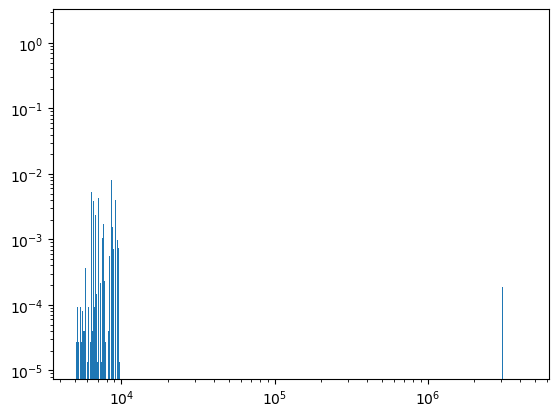

In [14]:
plt.bar(full_data_gr['genome_pos'], full_data_gr['freq_percent'])
plt.yscale('log')
plt.xscale('log')
# plt.xlim(8000, 10000)
plt.show()


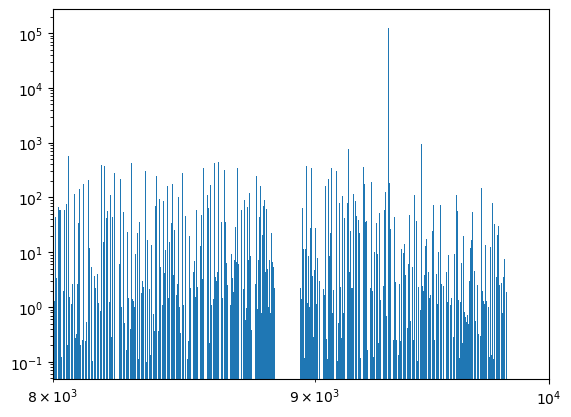

In [17]:
plt.bar(full_data_gr['genome_pos'], full_data_gr['freq'])
plt.yscale('log')
plt.xscale('log')
plt.xlim(8000, 10000)
plt.show()


In [7]:
merged_df = merged_df.sort_values('genome_pos')

In [6]:
def print_full(x):
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 2000)
    pd.set_option('display.float_format', '{:20,.2f}'.format)
    pd.set_option('display.max_colwidth', None)
    print(x)
    pd.reset_option('display.max_rows')
    pd.reset_option('display.max_columns')
    pd.reset_option('display.width')
    pd.reset_option('display.float_format')
    pd.reset_option('display.max_colwidth')

In [ ]:
merged_df['change']

In [8]:
print_full(merged_df['change'].head())

4781965    c.-199G>T
3858560    c.-199G>C
4697070    c.-199G>T
3324786    c.-198A>C
1481464    c.-198A>G
Name: change, dtype: object


In [5]:
full_data.rename(columns={'sample_id': 'wgs_id'}, inplace=True)
merged_df = pd.merge(full_data, df[['wgs_id', 'country_code']], on='wgs_id', how='left')
merged_df.rename(columns={'wgs_id': 'sample_id'}, inplace=True)

In [53]:
merged_df.to_csv('/mnt/storage10/lwang/Projects/Amplicone_design_tool/model2in1/variants.csv', index=False)

In [15]:
intersect = np.intersect1d(full_data['sample_id'].unique(), df['wgs_id'].unique())
union = list(set(full_data['sample_id'].unique()) | set(df['wgs_id'].unique()))
len(union) - len(intersect) 

103111

In [10]:
df.columns

Index(['wgs_id', 'mapped_reads', 'percent_mapped', 'median_depth',
       'missingness', 'main_lineage', 'sublineage', 'drug_resistance_type',
       'run_accession', 'sample_accession', 'accession', 'study_accession',
       'project_name', 'study_name', 'country_code', 'collection_date',
       'date_of_collection', 'patient_id', 'geographic_source', 'location',
       'country', 'rifampicin', 'isoniazid', 'ethambutol', 'pyrazinamide',
       'streptomycin', 'ofloxacin', 'moxifloxacin', 'levofloxacin', 'amikacin',
       'kanamycin', 'capreomycin', 'ciprofloxacin', 'prothionamide',
       'ethionamide', 'clarithromycin', 'clofazimine', 'bedaquiline',
       'cycloserine', 'linezolid', 'para-aminosalicylic_acid', 'rifabutin',
       'delamanid', 'host_body_site', 'environment_material', 'sample_alias',
       'sample_title', 'host_status', 'hiv_status', 'HIV_status',
       'first_public', 'host', 'id', 'host_sex', 'broker_name', 'tissue_type',
       'culture_collection', 'isolation_